#                            Titanic - ML  from the disaster



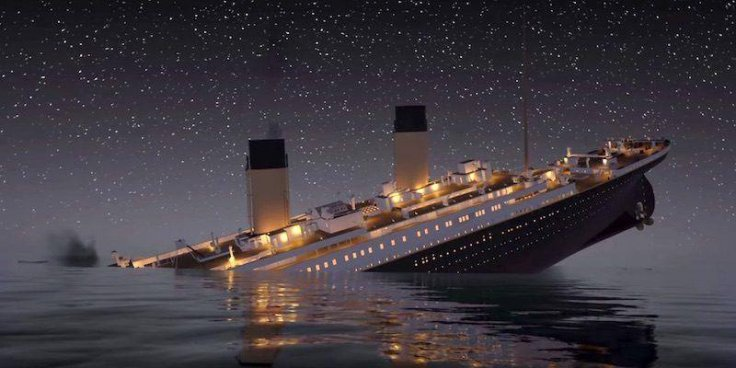


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

In this notebook, we analyse the data available in Kaggle at "https://www.kaggle.com/c/titanic" to predict the survivors onboard titanic.


The dataset consists of _train.csv_ and _test.csv_ which helps us in the analyse and predict the survivors.

In [1]:
# We will import the necessary packages required for the analysis.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#to display charts inline in notebook
%matplotlib inline 

In [2]:
#Import dataset using pandas, the train.csv and test.csv files are imported as below

test=pd.read_csv('/Users/anoopsp/Desktop/Data Science Portfolio Projects/datasets/titanic/test.csv')
train=pd.read_csv('/Users/anoopsp/Desktop/Data Science Portfolio Projects/datasets/titanic/train.csv')

## Data Analysis

Analysing data plays an important role in the Data Science project life cycle. The process consists of below

* Exploration of data.
* Handling missing values.
* Feature and Model Selection.
* Build and Predict Model.
* Deployment to Production. (Not discussed in this Notebook)


### Data Exploration

Real life data is always messy. Data columns might be numeric or categorical, understanding the datasets helps in efficient handling of it. 

* df.head( ) - Provides us with data sample
* df.info( ) - Provides us with total no. of entries, data types, missing rows and memory usage.

In [3]:
#Analyse the data in train.csv
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Analyse the data in test.csv
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


_we notice that train dataset has 891 rows and test has 418 rows. There are many columns in both datasets which have null values. Handling null values and removing unwanted columns in the datasets helps us to build a robust model. The Machine Learning model needs the data to be numeric and doesnt work when there are missing values._

For handling missing values, we will merge both the train and test to a single dataset. This helps us in imputing the missing values. 

In [7]:
test['Survived']= -888 

In [8]:
titanic= pd.concat([train, test],axis=0,sort=True) # 'sort=True', sorts columns in our datasets while concatenation.

In [9]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


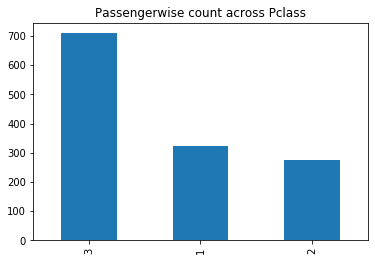

In [11]:
titanic['Pclass'].value_counts().plot(kind='bar',title='Passengerwise count across Pclass')

In [12]:
titanic.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64


df.isna( ) provides us with rows which have null values.  Looking at the data below, we notice Age, Cabin, Embarked and Fare has missing values

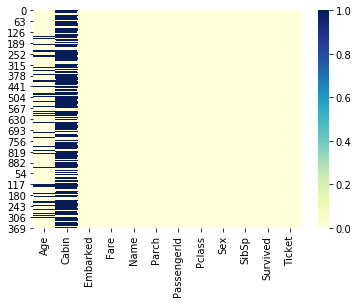

In [17]:
sns.heatmap(titanic.isnull(),annot=False,cmap='YlGnBu');

## Handling missing values

There are many ways to handle missing values in the data. 

* Delete the row or columns.
* Fill the missing values with numeric operation(mean,mode or std)


We will handle the missing data in the __Embarked__ column below

The Embarked locations are 

* C - Cherbourg
* Q - Queenstown
* S - Southhampton

In [13]:
titanic[titanic['Embarked'].isna()] # we notice there are 2 rows with missing Embarked values.

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [14]:
titanic.groupby(['Pclass','Sex','Embarked'])['Embarked'].count()

Pclass  Sex     Embarked
1       female  C            71
                Q             2
                S            69
        male    C            70
                Q             1
                S           108
2       female  C            11
                Q             2
                S            93
        male    C            17
                Q             5
                S           149
3       female  C            31
                Q            56
                S           129
        male    C            70
                Q            57
                S           366
Name: Embarked, dtype: int64

We notice most of the female passengers with Pclass=1 have boarded the ship either at __Cherbourg or Southampton__. Before we conclude to use these boarding points , we can check other features such as fare, which might help us in filling missing values.

In [15]:
titanic.groupby(['Pclass','Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

Looking at the fare of passengers, we can conclude the female passengers boarded the ship at __Southhampton__.

In [30]:
titanic['Embarked'].fillna('S',inplace=True)

In [24]:
titanic[titanic['Embarked'].isna()] # The missing values has been updated.

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [17]:
titanic.isna().sum() # we notice there is still missing values in Age and Cabin Columns

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

For current analysis we will impute the __Cabin__ columns, as there are too much of missing values. 1014 of values is missing out of 1309 values. Since 77% of values is missing, we will delete the column. 

In [27]:
titanic.drop('Cabin',axis=1,inplace=True) # dropping Cabin values

In [27]:
titanic.isna().sum()

Age            263
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

We will handle the missing values for __Fare__ column. Since there is a single row missing. We can either use mean or mode values.

In [28]:
titanic[titanic['Fare'].isna()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-888,3701


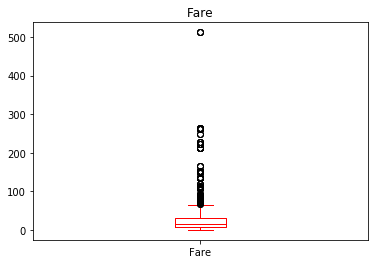

In [17]:
titanic['Fare'].plot(kind='box', title='Fare', color='r');

In [18]:
titanic.groupby(['Pclass','Sex','Embarked'])['Fare'].mean()

Pclass  Sex     Embarked
1       female  C           118.895949
                Q            90.000000
                S           101.069145
        male    C            94.622560
                Q            90.000000
                S            53.670756
2       female  C            27.003791
                Q            12.350000
                S            23.023118
        male    C            20.904406
                Q            11.489160
                S            20.073322
3       female  C            13.834545
                Q             9.791968
                S            18.083851
        male    C             9.775901
                Q            10.979167
                S            13.145977
Name: Fare, dtype: float64

We notice passenger boarded at Southhampton with Pclass as '3' , had an avg price of ticket at 13.14.

In [19]:
titanic['Fare'].fillna(13.14,inplace=True)

In [20]:
titanic.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

We have handled the missing values for Fare column. 

For Age columns, we have multiple way to analyse the data.

* We can have avg. of Age by Pclass and impute them.
* We can groupby Pclass, Sex, Embarked places.
* We can look at the name column, their title and define the ages.

We will look at the last method here, Using the Name column to update missing values of Age.

In [21]:
# Function to extract the title from the name 
def Title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


In [22]:
titanic['title']=titanic['Name'].map(lambda x: Title(x))

In [28]:
titanic.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [24]:
titanic.groupby('title')['Age'].median()

title
Lady       39.0
Master      4.0
Miss       22.0
Mr         29.0
Mrs        35.0
Officer    51.0
Sir        41.0
Name: Age, dtype: float64

In [25]:
title_age_median = titanic.groupby('title').Age.transform('median')
titanic.Age.fillna(title_age_median , inplace=True)

In [26]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [29]:
titanic.isna().sum()

Age            0
Embarked       2
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
title          0
dtype: int64

In [31]:
titanic.drop(['Name','Ticket','title'],axis=1,inplace=True)

In [32]:
titanic.groupby['']

(1309, 9)

In [33]:
titanic.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0
1,38.0,C,71.2833,0,2,1,female,1,1
2,26.0,S,7.9250,0,3,3,female,0,1
3,35.0,S,53.1000,0,4,1,female,1,1
4,35.0,S,8.0500,0,5,3,male,0,0


In [ ]:
titanic.drop('PassengerId',axis=1,inplace=True)

In [ ]:
titanic=pd.get_dummies(titanic)

In [ ]:
train=titanic[titanic['Survived']!=-888]

In [ ]:
test=titanic[titanic['Survived']==-888]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
X=train.drop('Survived',axis=1)
y=train.Survived

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [ ]:
tree_clf=DecisionTreeClassifier()
model_tree=tree_clf.fit(X_train,y_train)
predict_tree=tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [ ]:
accuracy_score(y_test,predict_tree)

In [ ]:
recall_score(y_test,predict_tree)

In [ ]:
precision_score(y_test,predict_tree)

In [ ]:
svc_clf=SVC(kernel='rbf',gamma='auto_deprecated')

model_svc=svc_clf.fit(X_train,y_train)

predict_svc=svc_clf.predict(X_test)

print('accuracy',accuracy_score(y_test,predict_svc))
print('precision',precision_score(y_test,predict_svc))
print('recall',recall_score(y_test,predict_svc))

In [ ]:
gaus_clf=GaussianNB()

model_gaus=gaus_clf.fit(X_train,y_train)
predict_gaus=gaus_clf.predict(X_test)

print('accuracy',accuracy_score(y_test,predict_gaus))
print('precision',precision_score(y_test,predict_gaus))
print('recall',recall_score(y_test,predict_gaus))


In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
log_model=LogisticRegression()

model_log=log_model.fit(X_train,y_train)
predict_log=log_model.predict(X_test)

print('accuracy',accuracy_score(y_test,predict_log))
print('precision',precision_score(y_test,predict_log))
print('recall',recall_score(y_test,predict_log))

In [ ]:
Ber_clf=BernoulliNB()

model_Ber=Ber_clf.fit(X_train,y_train)
predict_Ber=Ber_clf.predict(X_test)

print('accuracy',accuracy_score(y_test,predict_Ber))
print('precision',precision_score(y_test,predict_Ber))
print('recall',recall_score(y_test,predict_Ber))


In [ ]:
train.head()

In [ ]:
test_X=test.drop('Survived',axis=1)

In [ ]:
train_X=train.drop('Survived',axis=1)
train_y=train.Survived

In [ ]:
final=LogisticRegression()

model_log=final.fit(train_X,train_y)
final_pred=final.predict(test_X)

log_df=pd.DataFrame(final_pred)

log_out=pd.concat([test_new['PassengerId'],log_df],axis=1)

log_out.columns=['PassengerID','Survived']


log_out.to_csv('Output_log.csv',index=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random=RandomForestClassifier()

model_rand=random.fit(train_X,train_y)
final_rand=random.predict(test_X)

rand_df=pd.DataFrame(final_rand)

rand_out=pd.concat([test_new['PassengerId'],rand_df],axis=1)

rand_out.columns=['PassengerID','Survived']


rand_out.to_csv('Output_rand.csv',index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_X.SibSp.value_counts()

In [ ]:
train_X=pd.get_dummies()

In [ ]:
scale=MinMaxScaler()

X_scale=scale.fit_transform(train_X)
y_scale=scale.fit_transform(train_y)

t_scale=scale.fit_transform(test_X)

In [ ]:
svc_clf=SVC(kernel='rbf',gamma='auto_deprecated')

model=svc_clf.fit(train_X,train_y)

predict_output=svc_clf.predict(test_X)


In [ ]:
pred=pd.DataFrame(predict_output)

In [ ]:
test_new

In [ ]:
pred_out=pd.concat([test_new['PassengerId'],pred],axis=1)

In [ ]:
pred_out.columns=['PassengerID','Survived']

In [ ]:
pred_out.to_csv('Output.csv',index=False)

UsageError: Line magic function `%version_information` not found.
